# Example of Boxdetection

Note: The example image is taken from https://dx.doi.org/10.5281/zenodo.376281

In [1]:
%matplotlib inline
from molyso.generic.rotation import find_rotation, rotate_image
from mfisp_boxdetection import find_box
from scipy.ndimage import imread
from matplotlib import pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
image_file = 'example_box.png'

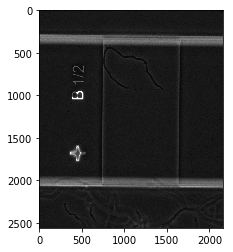

In [2]:
img = imread(image_file)
plt.imshow(img)

In [3]:
# box detection needs properly oriented images (i.e. box lines along straight lines)
rotation_angle = find_rotation(img)
rotation_angle

0.5599717846989801

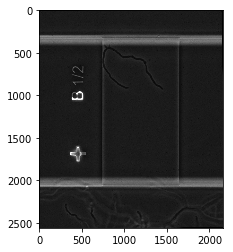

In [4]:
img_corrected = rotate_image(img, rotation_angle)
plt.imshow(img_corrected)

In [5]:
top, bottom, left, right = find_box(img_corrected, subsample=1, debug=False)
(top, bottom, left, right)

(362, 2063, 748, 1642)

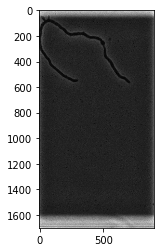

In [6]:
import boxdetection.boxdetection
box = img_corrected[top:bottom, left:right]
plt.imshow(box)

# Together as one function
Hint: `find_box` will attempt to find a box, or return coordinates of the whole image (i.e. no crop) if it does not find one. If one does want a clean error rather, one can specifiy `throw=True`, and `find_box` will throw a `RuntimError` if it does not find a box.

In [7]:
from molyso.generic.rotation import find_rotation, rotate_image
from boxdetection import find_box

def crop_box(img, subsample=1, throw=False, debug=False):
    rotation_angle = find_rotation(img)
    img_corrected = rotate_image(img, rotation_angle)
    top, bottom, left, right = find_box(img_corrected, subsample=subsample, throw=throw, debug=debug)
    box = img_corrected[top:bottom, left:right]
    return box

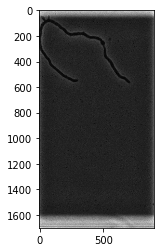

In [8]:
%matplotlib inline
from scipy.ndimage import imread
from matplotlib import pyplot as plt
# in one go
plt.imshow(crop_box(imread('example_box.png')))